In [44]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

In [45]:
#Generate Datset
def generate_data(samples_per_class=180):
    np.random.seed(32)
    class1 = np.random.randn(samples_per_class, 2) + np.array([2, 2])
    class2 = np.random.randn(samples_per_class, 2) + np.array([6, 6])
    class3 = np.random.randn(samples_per_class, 2) + np.array([10, 2])

    X = np.vstack([class1, class2, class3])
    y = np.array([0]*samples_per_class + [1]*samples_per_class + [2]*samples_per_class)
    return X, y

X, y = generate_data()

# One-hot encode labels
encoder = OneHotEncoder(sparse_output=False)
y_encoded = encoder.fit_transform(y.reshape(-1, 1))

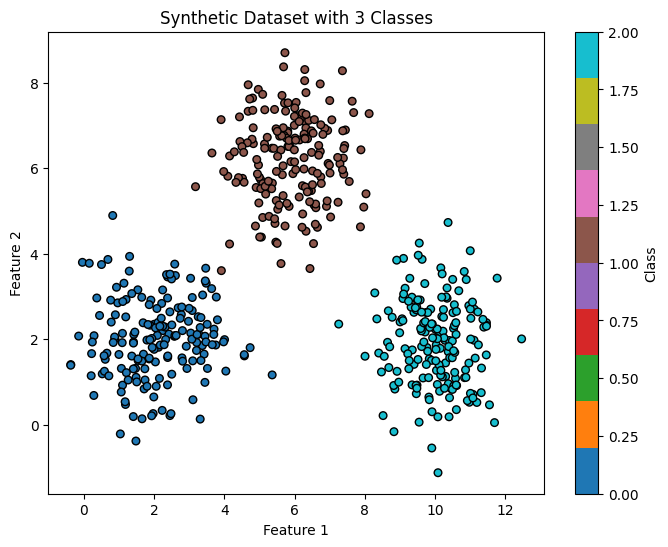

In [46]:
plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=y, cmap="tab10", s=30, edgecolors="k")
plt.title("Synthetic Dataset with 3 Classes")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label="Class")
plt.show()

In [50]:
class NeuralNetwork(object):
    def __init__(self, input_dim=2, hidden1=10, hidden2=8, hidden3=6, output_dim=3, lr=0.2):
        self.learning_rate = lr
        self.W_HI = np.random.randn(input_dim, hidden1)
        self.W_H2 = np.random.randn(hidden1, hidden2)
        self.W_H3 = np.random.randn(hidden2, hidden3)
        self.W_OH = np.random.randn(hidden3, output_dim)

    def sigmoid(self, x, der=False):
        if der:
            return x * (1 - x)
        else:
            return 1 / (1 + np.exp(-x))

    def softmax(self, x):
        exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp_x / np.sum(exp_x, axis=1, keepdims=True)

    def feedForward(self, X):
        self.hidden_output1 = self.sigmoid(np.dot(X, self.W_HI))
        self.hidden_output2 = self.sigmoid(np.dot(self.hidden_output1, self.W_H2))
        self.hidden_output3 = self.sigmoid(np.dot(self.hidden_output2, self.W_H3))
        self.pred = self.softmax(np.dot(self.hidden_output3, self.W_OH))
        return self.pred

    def backPropagation(self, X, Y, pred):
        output_error = pred - Y
        hidden3_error = output_error.dot(self.W_OH.T)
        hidden3_delta = hidden3_error * self.sigmoid(self.hidden_output3, der=True)
        hidden2_error = hidden3_delta.dot(self.W_H3.T)
        hidden2_delta = hidden2_error * self.sigmoid(self.hidden_output2, der=True)
        hidden1_error = hidden2_delta.dot(self.W_H2.T)
        hidden1_delta = hidden1_error * self.sigmoid(self.hidden_output1, der=True)

        self.W_HI -= self.learning_rate * X.T.dot(hidden1_delta)
        self.W_H2 -= self.learning_rate * self.hidden_output1.T.dot(hidden2_delta)
        self.W_H3 -= self.learning_rate * self.hidden_output2.T.dot(hidden3_delta)
        self.W_OH -= self.learning_rate * self.hidden_output3.T.dot(output_error)

    def train(self, X, Y, epochs=1000):
        mse_list = []
        for i in range(epochs):
            pred = self.feedForward(X)
            self.backPropagation(X, Y, pred)
            mse = np.mean((Y - pred) ** 2)
            mse_list.append(mse)
            if i % 100 == 0:
                print(f"Epoch {i}: MSE={mse:.4f}")

        # Plot MSE
        plt.figure(figsize=(8,6))
        plt.plot(mse_list, label="MSE", color="blue")
        plt.xlabel("Epochs")
        plt.ylabel("Mean Squared Error")
        plt.title("MSE Loss over Training")
        plt.legend()
        plt.show()

    def predict(self, X):
        output = self.feedForward(X)
        return np.argmax(output, axis=1)


Epoch 0: MSE=0.3855
Epoch 100: MSE=0.2222
Epoch 200: MSE=0.2222
Epoch 300: MSE=0.2222
Epoch 400: MSE=0.2222
Epoch 500: MSE=0.2222
Epoch 600: MSE=0.2222
Epoch 700: MSE=0.2222
Epoch 800: MSE=0.2222
Epoch 900: MSE=0.2222


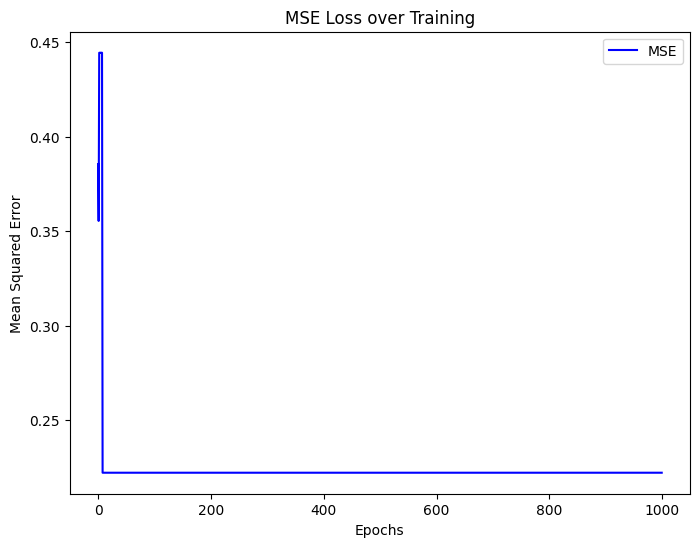

In [51]:
nn = NeuralNetwork()
nn.train(X, y_encoded, epochs=1000)


In [52]:
y_pred = nn.predict(X)
accuracy = np.mean(y_pred == y)
print(f"Training Accuracy: {accuracy*100:.2f}%")


Training Accuracy: 33.33%
